# Interaction stratégique

## I. Jouer en simultané

On considère pour commencer les situations où les agents von jouer leurs actions de manière simultané. 
Pour la simplicité, les exemples impliquent à chaque fois deux agents, mais les notions sont les mêmes pour plus de deux agents. 

### 1. Un problème classique: le dilemme du prisonnier

Deux joueurs ont été appréhendés après un vol. Il est clair que au moins un des deux a commis ce délit. 
Ils sont interrogés en parallèle, et disposent des mêmes actions: garder le silence, ou dénoncer l'autre. 
Ils jouent donc en simultané, sans se concerter. 
Selon le choix de stratégies des joueurs, les gains sont les suivants: 

|<span style="color:red">R</span> \ <span style="color:blue">B </span>| silence | dénoncer |
|------|------|------|
| **silence**  | (<span style="color:red">20</span>,<span style="color:blue">20</span>)  | (<span style="color:red">0</span>,<span style="color:blue">30</span>) |
| **dénoncer**  | (<span style="color:red">30</span>,<span style="color:blue">0</span>)  | (<span style="color:red">10</span>,<span style="color:blue">10</span>)  | 




Analysons du point de vue du joueur  <span style="color:red">R</span> les *meilleures réponses* selon les choix de l'agent <span style="color:blue">B</span>:  
* si <span style="color:blue">B</span> garde le silence, il vaut mieux que <span style="color:red">R</span> dénonce l'autre (30>20)
* si <span style="color:blue">B</span> dénonce, il vaut mieux que <span style="color:red">R</span> dénonce aussi (10>0)

Les meilleures réponses pour <span style="color:red">R</span> sont donc: 

| meilleure réponse | action de <span style="color:blue">B</span>  |
|------|------|------|
|<span style="color:red">dénonce</span> | <span style="color:blue">dénonce</span>|
|<span style="color:red">dénonce</span> | <span style="color:blue">silence</span>|



Lorsque, pour un joueur *X*, la table de meilleures réponses indique toujours la même stratégie, on parle de *stratégie dominante* pour le joueur *X*. 

> La stratégie **dénoncer** est donc dominante pour R et pour B

Lorsque les stratégies sont des meilleures réponses mutuelles, on est dans un **équilibre de Nash**. 

> Ici la stratégie jointe **dénoncer/dénoncer** est un EN

Ici, on observe que cet équilibre de Nash est dominé par le résultat (20,20) qui serait atteint si les deux joueurs gardaient le silence. 

Ce type de dilemme a été largement étudié, et même utilisé dans des jeux (voir la vidéo de Golden Balls, émission de TV anglaise reposant sur une situation proche). 

On a pour coutume de parler d'action de coopération, ou de trahison dans ce cadre. On peut varier les valeurs dans la matrice. Il y a une valeur C obtenue en cas de coopération mutuelle (cc), une valeur P de piège obtenue en cas de trahison mutuelle (tt), et dans le cas (tc), une valeur T de traitrise et une D de dupe. 
Pour rester dans une situation de dilemme, il faut que T>C>P>D.  


In [12]:
def jouerDP(s1,s2):
    gains = {'cc':(20,20), 'ct':(0,30), 'tt':(10,10), 'tc': (30,0)}
    return gains[str(s1)+str(s2)]

print (jouerDP('c','c'))

(20, 20)


### 2. Dilemme du prisonnier itéré

Imaginons à présent que deux joueurs (toujours les mêmes) jouent plusieurs fois d'affilée un dilemme du prisonnier. 


Définir une stratégie pour le dilemme du prisonnier itéré, c'est donc définir quel coup jouer, en fonction de :
* les coups que l'on a joués précédemment
* les coups que l'autre a joués précédemment

Notez que cela inclue également quel premier coup jouer. Les stratégies peuvent également faire intervenir des aspects stochastiques, etc.

Des stratégies classiques sont les suivantes: 
* toujours coopérer/trahir
* jouer au hasard
* alterner trahison et coopération
* donnant-donnant (tit-for-tat): commencer par coopérer, puis jouer comme le dernier coup joué par l'adversaire
* rancunière: on coppère, et dès que l'autre trahit, on trahit pour toujours

In [31]:
import random
def prochainCoup(mesCoups,adversCoups,nom):
    """selon la liste de mes coups et des coups de l'autre
    je choisis un coup """
    if nom=='titfortat':
        if adversCoups == []:
            return 'c'
        else:
            return adversCoups[-1]
    if nom=='random':
        return random.choice(['t','c'])
    if nom=='alterne':
        if mesCoups == []:
            return 'c'
        elif mesCoups[-1]=='t':
            return 'c'
        else:
            return 't'
    if nom=='equipeA':
        nbC = 0
        nbT = 0
        for i in adversCoups:
            if i =='c':
                nbC += 1
            else:
                nbT += 1
        if nbC == nbT:
            return 't'
        if nbC > nbT:
            return 'c'
        else:
            return 't'
    if nom=='equipeB':
        if adversCoups == []:
            return 'c'
        if adversCoups[-1]=='t':
            return 't'
        elif len(adversCoups)>=8:
            return 't'
        return 'c'

In [16]:
print (prochainCoup([],[],'random'))

c


In [32]:
nbIterations=10
toPlot = {'R':[0], 'B':[0]}
coupsJoues = {'R': [], 'B': []}
gainsCumules = {'R': 0, 'B': 0}
strategie = {'R': 'equipeA', 'B': 'equipeB'}

for i in range(nbIterations):
    coupR = prochainCoup(coupsJoues['R'],coupsJoues['B'],strategie['R'])
    coupB = prochainCoup(coupsJoues['B'],coupsJoues['R'],strategie['B'])
    gainR,gainB = jouerDP(coupR,coupB)
    gainsCumules['R']+=gainR
    gainsCumules['B']+=gainB
    coupsJoues['R']+=coupR
    coupsJoues['B']+=coupB
    #print ("R joue ",coupR, ", B joue", coupB, "--> gains:", gainR, gainB)
    toPlot['R'].append(gainsCumules['R'])
    toPlot['B'].append(gainsCumules['B'])

    

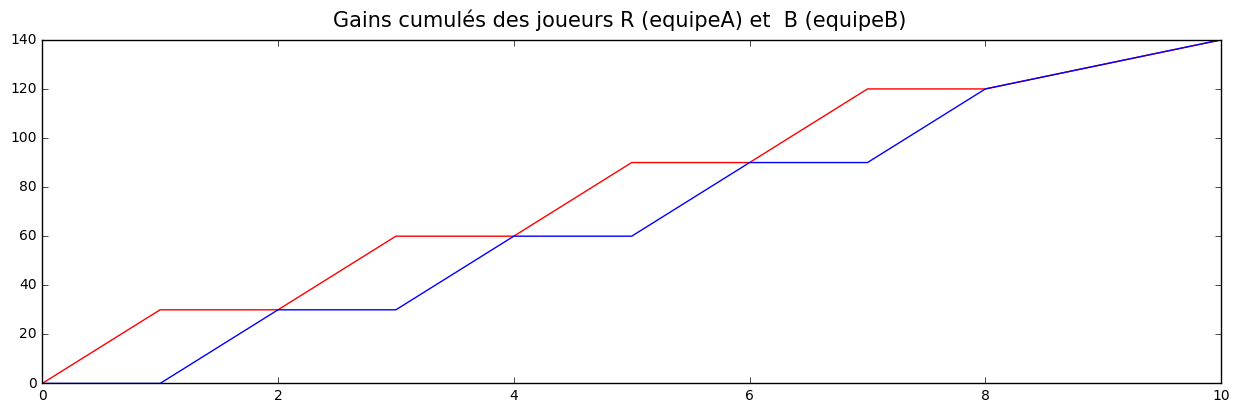

In [33]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import networkx as nx
import pylab
figsize(12.5, 4)
#print (toPlot['R'],toPlot['B'])
p = np.linspace(0, nbIterations, nbIterations+1)
plt.plot(p, toPlot['R'], color='red')
plt.plot(p, toPlot['B'], color = 'blue')
legende = "Gains cumulés des joueurs R (" + strategie['R'] + ") et  B (" + strategie['B']+")"
plt.suptitle(legende, y=1.02, fontsize=15)
plt.tight_layout()


> En 1980, Robert Axelrod propose d'organiser des confrontations de stratégies lors d'un tournoi <a>https://en.wikipedia.org/wiki/The_Evolution_of_Cooperation</a>. 
C'est à cette occasion que la stratégie tit-fot-tat est proposée, par Anatol Rapoport. 

Comment évaluer la qualité des stratégies proposées? 
Il faut définir précisément ce que l'on veut dire par *meilleure stratégie*. 
On peut penser au moins à deux définitions: 
* une stratégie qui bat toutes (ou le maximum) d'autres stratégies lors des matchs un contre un
* une stratégie qui obtient un gain cumulé après tous les matchs le plus élevé possible. 

> Si l'objectif est simplement de battre les autres stratégies, alors la stratégie *toujours trahir* est la meilleure. Mais si l'objectif est de maximiser le gain sur l'ensemble des rencontres, alors les choses sont moins claires...
En pratique, Tit-for-tat s'avère être une excellente stratégie. Pourtant elle est clairement battue par une stratégie de trahison constante, par exemple. Mais elle obtient de très bons scores contre toutes les stratégies. 



Pour aller plus loin sur sur le dilemme du prisonnier, voir par exemple le site et les travaux de B. Beaufils, J.-P. Delahaye et Ph. Mathieu à l'Université de Lille. <a>http://www.lifl.fr/IPD/ipd.html</a>


## II. Jouer séquentiellement

Considérons à présent un deuxième jeu très classique: **le jeu de la poule mouillée** (*the game of chicken*) 

|<span style="color:red">R</span> \ <span style="color:blue">B </span>| sauter | rester |
|------|------|------|
| **sauter**  | (<span style="color:red">5</span>,<span style="color:blue">5</span>)  | (<span style="color:red">2</span>,<span style="color:blue">7</span>) |
| **rester**  | (<span style="color:red">7</span>,<span style="color:blue">2</span>)  | (<span style="color:red">0</span>,<span style="color:blue">0</span>)  | 

Si l'on analyse ce jeu en tenant à présent compte de la séquence, c'est-à-dire du fait que un joueur jour après l'autre, que pouvons-nous en dire? 

### 1. Induction à rebours et algorithme Minimax

On représente le jeu comme un arbre, où chaque joueur joue alternativement à chaque niveau de profondeur. 
L'analyse peut alors se faire à rebours: en remontant depuis les feuilles, on fait suppose que le joueur, confronté à plusieurs coups possibles, choisira celui qui lui procure *à ce stade-là* le meilleur gain. 
Au niveau au-dessus on peut itérer ce même raisonnement, suppoant ce que fera le joueur suivant, et ainsi de suite jusqu'à la racine. 

Dans le cas où le jeu est un jeu à **somme nulle**, un joueur cherche à minimiser le score tandis que l'autre cherche à maximiser le score, on parle donc d'algorithme **minimax**. 

La valeur retournée par l'algorithme de recherche minimax est la valeur théorique du jeu sous l'hypothèse que les agents jouent rationnellement selon cet algorithme. 


### 3. Elagage Alpha-beta (pruning)

Pour éviter une exploration complète de l'arbre de jeu, on peut exploiter le fait que les joueurs sont des MINimisateurs et des MAXimisateurs. On va garder mémoire dans la recherche de deux valeurs, qui vont parfois permettre de couper certaines parties de l'arbre de recherche. 

* la valeur $\alpha$ est une borne inf que la recherche maximise. C'est donc la valeur min que peut se garantir le joueur MAX. 
* la valeur $\beta$ est une borne sup que la recherche minimise. C'est donc la valeur max que peut se garantir le joueur MIN. 

Donc le joueur MAX met à jour les valeurs $\alpha$, et le joueur MIN met à jour les valeur $\beta$. 

Il y a donc deux types de coupes dans l'arbre de recherche qui peuvent survenir: 
* une **coupe $\alpha$** survient lorsque, pour un noeud MIN, on a trouvé un noeud parmi les fils avec une valeur $\leq \alpha$
* une **coupe $\beta$** survient lorsque, pour un noeud MAX, on a trouvé un noeud parmi les fils avec une valeur $\geq \beta$

Pour bien comprendre le principe de la coupe, il faut raisonner sur deux niveaux (MAX et MIN). Par exemple, pour une coupe $\alpha$, si on trouve pour un noeud MIN une valeur $\leq \alpha$ cela signifie que MIN remontera une valeur $\leq \alpha$ (il minimise), quelque soient les valeurs des autres fils explorés. Or (au dessus) MAX a une garantie d'obtenir au moins $\alpha$. Poursuivre l'exploration est donc superflu. 


In [36]:
def alphabeta(state):
    """ implementation de alphabeta, version Russel & Norvig, Chapter 6
        """
    v = maxValue(state,-inf,inf)
    return v

def maxValue(state,alpha,beta):
    if feuille(state): # si feuille on renvoie la valeur
        return valeur[state]
    v = -inf
    for s in successeurs[state]:
        print ("étendu noeud ", s)
        v = max(v,minValue(s,alpha,beta))
        if v >= beta: # coupe beta, pas la peine d'étendre les autres fils
            print ("coupe beta")
            return v
        alpha = max(alpha,v) # mise à jour de alpha par MAX
    return v
            
def minValue(state,alpha,beta):
    if feuille(state): # si feuille on renvoie la valeur
        return valeur[state]
    v = inf
    for s in successeurs[state]:
        print ("étendu noeud ", s)
        v = min(v,maxValue(s,alpha,beta))
        if v <= alpha: # coupe alpha, pas la peine d'étendre les autres fils
            print ("coupe alpha")
            return v
        beta = min(beta,v)
    return v

#--- petit test rapide ---#

inf = 1000 # joue le role de infini
#successeurs = {'a':['b','c','d'],'b':['e','f','g'],'c':['h','i','j'],'d':['k','l','m']}
#valeur = {'e':3, 'f':12, 'g': 8, 'h': 2, 'i':4, 'j':6, 'k':14, 'l':5, 'm':2}
successeurs = {'a':['b','c'],'b':['d','e'],'c':['f','g'],'d':['h','i'],'e':['j','k'],'f':['l','m'],'g':['n','o']}
#valeur = {'h':4, 'i':9, 'j': 8, 'k': 12, 'l':5, 'm':6, 'n':1, 'o':7}
valeur = {'h':12, 'i':49, 'j': 39, 'k': 36, 'l':3, 'm':18, 'n':4, 'o':5}

def feuille(state): # les feuilles n'apparaissent pas comme clés dans mon dictionnaire successeurs
    return state not in successeurs

print (alphabeta('a'))




étendu noeud  b
étendu noeud  d
étendu noeud  h
étendu noeud  i
étendu noeud  e
étendu noeud  j
étendu noeud  k
étendu noeud  c
étendu noeud  f
étendu noeud  l
étendu noeud  m
coupe alpha
39


### 4. L'exemple du jeu de Hex

Le jeu de Hex est un jeu combinatoire dont les règles s'expriment très simplement, mais qui est d'une grande richesse. Les règles sont les suivantes: 
* chaque joeur peut poser à son tour une tuile n'importe où sur le terrain
* le joueur qui parvient à relier ses deux bordures (de même couleur) est le gagnant

![Une position gagnante pour le joueur bleu (image Wikipedia)](https://upload.wikimedia.org/wikipedia/commons/3/38/Hex-board-11x11-%282%29.jpg)

Ce jeu possède quelques propriétés remarquables:
* les matchs nuls ne peuvent pas se produire
* tout joueur jouant en premier dispose d'une **stratégie gagnante** (il peut donc gagner quelque soit les coups joués par les autres). 

Toutefois ces stratégies gagnantes ne sont connues que pour les petites tailles de parties (jusqu'à 7x7 à ma connaissance). 




> Version du 26 Février 2016. 
En cas de problème d'affichage, ouvrir l'URL dans le <a>nbviewer.jupyter.org/</a>
Pour profiter pleinement du notebook et pouvoir tester de manière interactive, vous pouvez installer le notebook de IPython